# **`Import Libraries`**

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# **`Import Dataset`**

In [71]:
df = pd.read_csv('Power Plant Data.csv')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [75]:
type(df)

pandas.core.frame.DataFrame

# **`Define x and y`**

In [78]:
x=df.iloc[:,0:df.shape[1]-1]
x

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [80]:
y=df.iloc[:,-1]
y

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64

# **`Split the dataset in training set and testing set`**

In [83]:
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# **`Train the model on the training set`**

In [88]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [90]:
lr.fit(x_train,y_train)

LinearRegression()

In [92]:
y_pred = lr.predict(x_test)
y_pred

array([473.17776472, 467.37943314, 462.00633839, ..., 459.08822201,
       435.54708796, 472.60124667])

# **`Evaluate the Model`**

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9304068493471925

# **`Plot the results`**

Text(0.5, 1.0, 'Actual and Predicted Values')

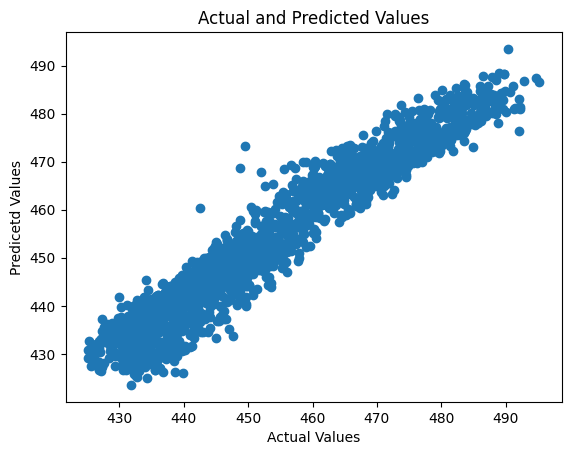

In [98]:
plt.plot(y_test,y_pred,'o')
plt.xlabel('Actual Values')
plt.ylabel('Predicetd Values')
plt.title('Actual and Predicted Values')

# **`Predicted Values`**

In [101]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df

,Actual Value,Predicted value,Difference
2843,477.41,473.177765,4.232235
9115,470.84,467.379433,3.460567
4618,467.68,462.006338,5.673662
4205,451.45,452.245945,-0.795945
9181,448.39,450.979200,-2.589200
...,...,...,...
8402,443.04,443.646603,-0.606603
5308,476.04,470.709428,5.330572
5211,459.91,459.088222,0.821778
2603,441.51,435.547088,5.962912
